# EXPLORATORY DATA ANALYSIS - RETAIL

## In this dataset, we have many features like ship mode, Segment, country, City, State, Postal code, Region, category, sub-category, sales, Quantity, discount, and the Dependent variable is profit. The remaining are independent variables.

## Here we will see for weak areas where there is less profit and will see how to overcome it.

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings ('ignore')
sns.set(style="darkgrid") 
%matplotlib inline

In [2]:
store_df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Project\EDA on sample superstore\SampleSuperstore.csv")

In [3]:
#Data visualization

In [4]:
store_df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
store_df.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
store_df.shape

(9994, 13)

## View all the columns in the Dataframe.


In [7]:
store_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## View the information like Range index, datatypes, number of non-null entries for each column by using the info() method.


In [8]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Here, we can say that 4 columns contains numeric value while, others have object data type.

## Also, there are not any null values in the whole DataSet which can be clearly seen from above data means there is no missing values.

# To check if there are null values in the df, use isnull() method.


In [9]:
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
## There are no null values over the entire data.

## View the unique categories in the data frame.

In [11]:
print(store_df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


## View the states in the dataset.


In [12]:
print(store_df['State'].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


## Similarly, to view the number of unique entries in the column, use the unique() method.


In [13]:
no_of_states=store_df['State'].nunique()
print("There are %d states in this df."%no_of_states)

There are 49 states in this df.


In [14]:
print(store_df['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [15]:
no_of_subcategory=store_df['Sub-Category'].nunique()
print("Categories are divided into %d subcategories"%no_of_subcategory)

Categories are divided into 17 subcategories


In [16]:
store_df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

## View the statistical description of the Dataframe. Description contains the count of features, mean of them, Standard deviation, minimum and maximum values in that particular attribute, 25%, 50%, 75% of the values in the dataset. To view the statistical description of the dataset, use the describe() method.



In [17]:
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Creating Loss Dataframe

In [18]:
loss_df=store_df[store_df['Profit'] < 0]

## This will create a new df with all the features where profit is less than Zero.

In [19]:
loss_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [20]:
#View the shape of loss df.

loss_df.shape

(1871, 13)

## We can see that there are 9994 rows in the overall superstore Dataframe. Now we have only 1871 rows that are related to loss.

## View the statistical description of the loss Dataframe.




In [21]:
loss_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,55991.122929,250.511574,3.762694,0.480887,-83.448042
std,26041.501999,715.067296,2.141347,0.235080,284.423422
min,1841.000000,0.444000,1.000000,0.100000,-6599.978000
25%,33024.000000,12.503000,2.000000,0.200000,-58.660950
50%,60623.000000,71.088000,3.000000,0.400000,-18.088200
75%,77095.000000,284.922000,5.000000,0.700000,-6.261500
max,98198.000000,22638.480000,14.000000,0.800000,-0.089500


In [22]:
Total_loss=np.negative(loss_df['Profit'].sum())
print("Total loss = %.2f" %Total_loss)

Total loss = 156131.29


In [23]:
loss_df.groupby(by='Segment').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,57202260,247196.2460,3651,476.76,-84945.7112
Corporate,30034273,131860.5383,2191,272.00,-44787.2076
Home Office,17522858,89650.3705,1198,150.98,-26398.3669


## More discount leads to more loss, so, to make more profit provide fewer discounts.

In [24]:
loss_df.groupby(by='Sub-Category').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Accessories,5286382,10958.8000,330,18.20,-930.6265
Appliances,4825871,3382.5340,235,53.60,-8629.6412
Binders,32609300,36140.6130,2456,452.40,-38510.4964
Bookcases,6423506,48072.7408,422,37.99,-12152.2060
Chairs,15008025,91988.4560,876,61.40,-9880.8413
Fasteners,701930,149.2800,55,2.40,-33.1952
Furnishings,10970913,12845.8440,597,88.60,-6490.9134
Machines,2236261,72456.2530,157,25.60,-30118.6682
Phones,6105294,35797.8400,476,46.60,-7530.6235


## –> We can observe more loss in the Binders category, machines category, and tables category when compared to other categories.

## –> Binders are more getting sold. So even giving less discount may lead to vast loss.

## –> So better to give discounts on which are getting less sold so that even they will start getting sold more.

In [25]:
loss_df['Sub-Category'].value_counts()

Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub-Category, dtype: int64

In [26]:
loss_df.groupby(by='City').sum().sort_values('Profit',ascending=True).head(10)

,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Philadelphia,4783713,70460.5510,892,115.30,-19590.7411
Houston,14256474,37640.7304,683,104.14,-14785.3668
Chicago,9397492,19910.0120,541,88.20,-11120.6271
San Antonio,2580831,17395.1450,139,17.10,-7831.0254
Lancaster,683904,7699.2420,71,9.40,-7632.4946
Burlington,108868,12044.8740,19,2.00,-5999.3318
Dallas,5487794,9994.0562,280,39.30,-4208.5218
Jacksonville,1237176,31146.2710,154,18.85,-4059.9857
New York City,400828,19533.8020,132,12.20,-3966.0226


## The above-mentioned list shows the names of the top 10 cities where loss is high.

In [27]:
loss_df.sort_values(['Sales'],ascending=True).groupby(by='Category').mean()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,59700.907563,361.184295,3.714286,0.367143,-85.344690
Office Supplies,54746.056433,103.395796,3.865688,0.617607,-63.899840
Technology,50287.590406,439.899974,3.553506,0.333579,-142.361322


## While calculating an average, we observed that more loss is in the technology category.

In [28]:
store_df.groupby(['State']).sum()['Sales'].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

## These are the last 10 states where sales are very less.

In [29]:
store_df.sort_values(['Segment'],ascending=True).groupby('Segment').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


## Here Consumer segment sales might be less when compared to other segments, but this is the only segment that provides the highest profits. So, if we increase sales in this Segment by advertisements or something else then, for sure, we can gain more profits.

In [30]:
store_df.groupby(by='Region').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151786150,501239.8908,8780,558.34,39706.3625
East,50171698,678781.2400,10618,414.00,91522.7800
South,55875052,391721.9050,6209,238.55,46749.4303
West,293739752,725457.8245,12266,350.20,108418.4489


## Here we can see that sales are less in the South Region. So, to get better profits or more sales we should focus on this area too.

# Visualizations

In [31]:
plt.rcParams['figure.figsize']=(15,3)

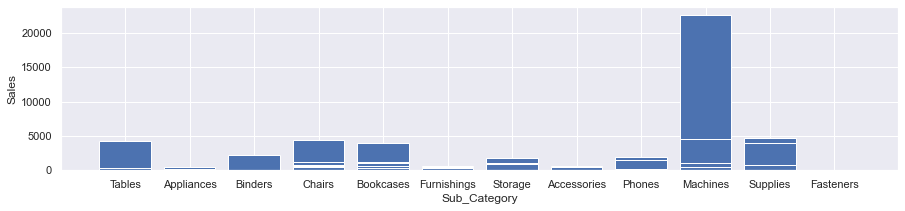

In [32]:
plt.bar(loss_df['Sub-Category'],loss_df['Sales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

## Here, we observed that the Sales for Fasteners, Appliances, Furnishings, and Accessories is very low.

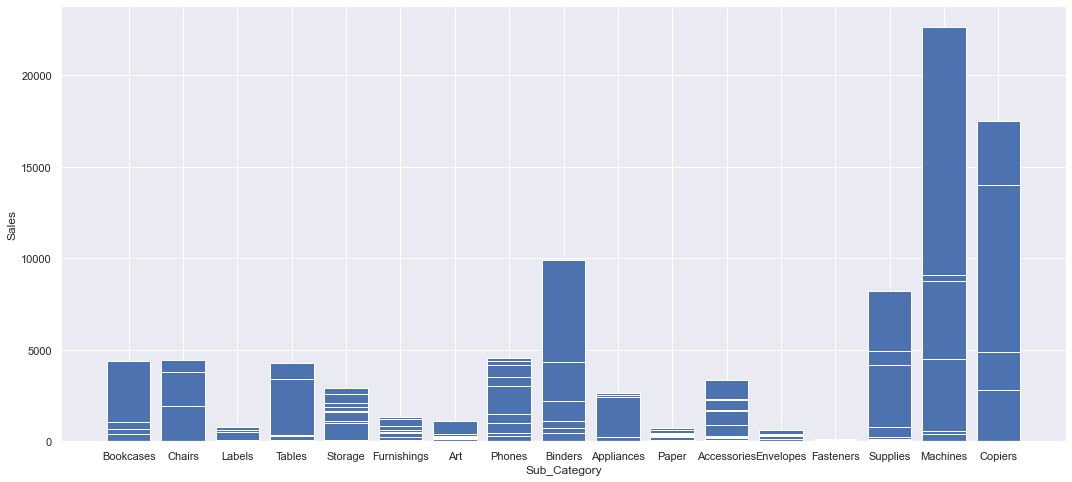

In [33]:
plt.rcParams['figure.figsize']=(18,8)
plt.bar(store_df['Sub-Category'],store_df['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

## When it comes to comparison in overall supermarket data, Fasteners, Labels, Furnishings, Art, paper, Envelopes, etc., sub-categories have very fewer sales, that’s why it needs to be improved.

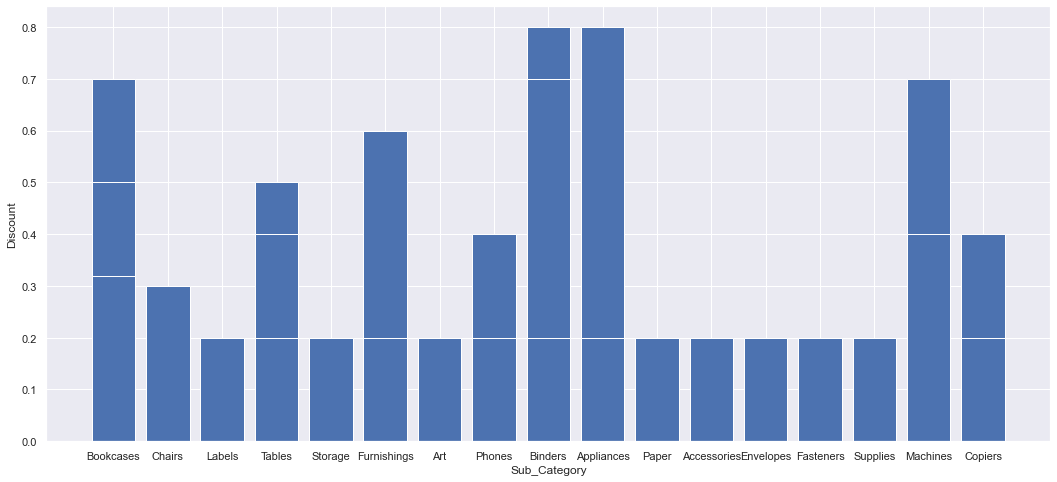

In [34]:
plt.rcParams['figure.figsize']=(18,8)
plt.bar(store_df['Sub-Category'],store_df['Discount']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Sub_Category');
plt.ylabel('Discount');

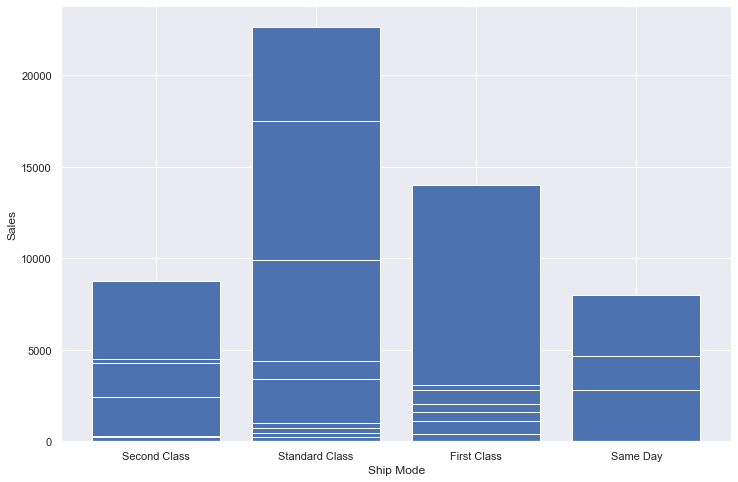

In [35]:
plt.rcParams['figure.figsize']=(12,8)
plt.bar(store_df['Ship Mode'],store_df['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Ship Mode');
plt.ylabel('Sales');

## Here we observe that the sales are high if the ship mode is standard class, and sales are low if the ship mode is either second class or same day.


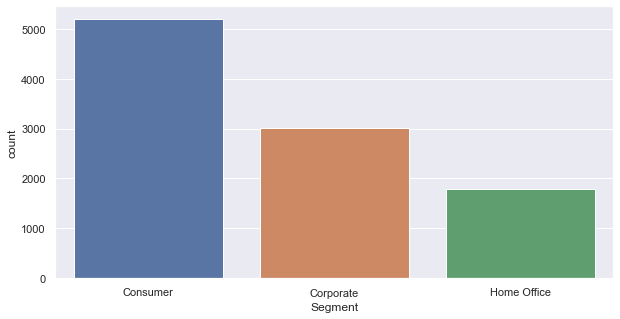

In [36]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x=store_df.Segment)
plt.show();

## In the Home Office Segment, we observe that the count is less. So convergent strategy and improvement is a necessity for this Segment.

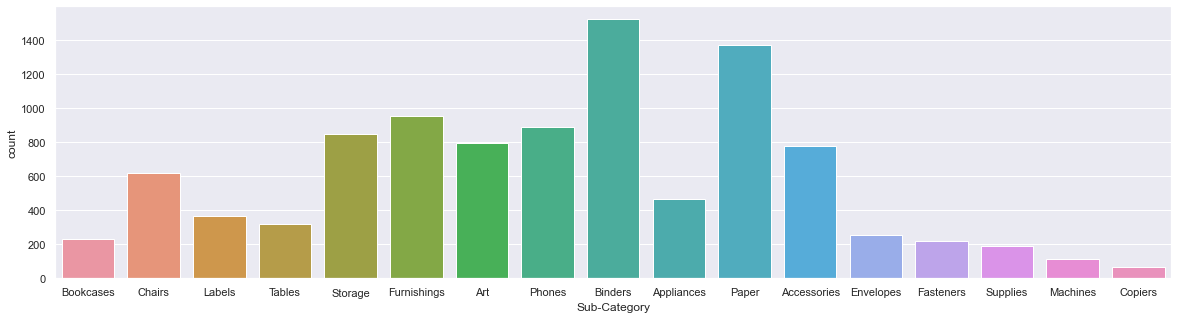

In [37]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Sub-Category',data=store_df)
plt.show()

## From the above data, it’s very much clear that the Copiers and Machines Subcategory needs improvement.

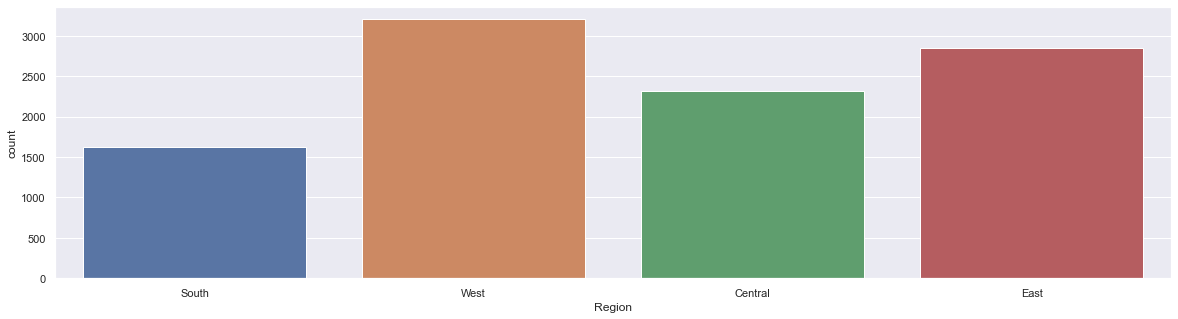

In [38]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Region',data=store_df)
plt.show()

## If we look into the data region-wise, we can conclude that the south region needs more improvement compared to others.

In [39]:
store_df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


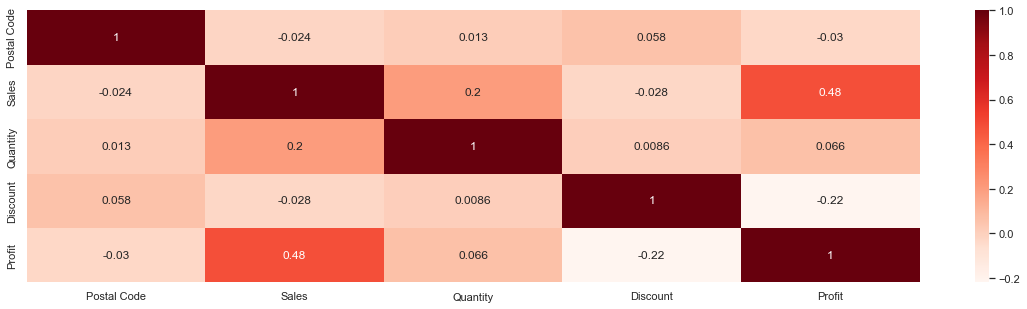

In [40]:
sns.heatmap(store_df.corr(),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(5,5)

# Analysis from Heatmap
### Sales and Profit are Moderately Correlated
### Discount and Profit are Negatively Correlated
# Overall Analysis
### The main reason which leads to loss is Discount as if some areas lead to loss due to more discounts, and some areas lead to fewer sales due to fewer discounts, hence it needs to be improved.
### It is better to give more discounts during festival seasons, additionally, that will result in more sales.
### The Home office segment needs better improvement.
### Some cities have fewer sales, lack of awareness can be the reason for this, hence advertising in those cities might help in more sales.

## Conclusion
## –> We have learned how to perform Exploratory Data Analysis.

## –> We performed it by using the sample superstore dataset.

## –>We have seen the loss areas in it and have seen some measures to overcome them.

## –> We have seen visualizations and drawn conclusions.